# IBM Employee Attrition

DATA ANALYTICS – IBM PROJECT
Why do workers resign from the positions they hold? Can employee attrition be anticipated? Can companies take steps to prevent high employee turn-over?

Employee attrition is the reduction of staff by voluntary or involuntary reasons. These can be through natural means like retirement, or it can be through resignation, termination of contract, or when a company decides to make a position redundant. Excessive involuntary attrition can be detrimental to the overall business goals, and can lead to understaffing, increased job burden on remaining employees, and harmful consequences to company reputation. 

You’ve just been hired by IBM to work in their Data Analytics sector. On your second day, you are given a dataset from HR that includes several records of employees that were with the company in the prior calendar year. Since the development of the dataset, some of those employees have since resigned from their positions. The company was surprised with the recent level of turnover and have tasked you with digging into the data to determine any insights about what leads to employee turnover, and alternatively, what aspects of the jobs can be protected to reduce employee turnover. 
Using the ‘IBM Employee Attrition’ dataset – your role is to comprehensively explore the data and generate meaningful insights into what the data is presenting. You should conclude your assignment with 3 recommendations you will make to the HR department regarding employee attrition. 


    • Data prep and cleaning – prior to exploring the data, you should ensure that the dataset is clean, all variables are in their proper format, and the data is free of missing, abnormal, or outlier values. 
    • Exploratory data analysis – you should explore every aspect of the data to determine the features of the data, the range of values for all variables of interest, and the relationships between variables. Exploration should be conducted outside of predictive modeling – in other words, you are not only interested in how the dependent and independent variables interact – you should also spend some time exploring variations in the data among variables (i.e. how does salary differ between genders? Does time spent in the company differ by job role?)
    • Modeling – after thoroughly exploring the data, create a logistic regression model that predicts employee attrition based on the other variables available to you. Clearly interpret your model findings. Re-run/tweak your model if you think you can find a better fit. 
    • Visualization – Create at least 3 visualizations that highlight some of the most interesting findings in your dataset. These can be findings from the regression model or any interesting relationships between variables. 

    Age
    Age of employee in years

    Attrition
    Employee attrition status; yes = employee left position, no = employee did not leave position

    BusinessTravel
    Frequency of travel necessary for job; Travel Rarely = business travel not frequently required, 
    Travel Frequently = business travel frequently required, Other = business travel required at other increments

    Department
    Department within company where employee works; research and development, sales, or other

    DistanceFromHome
    Distance job is from employees home (in Miles)

    Education
    Employee education level; 1 = below college, 2 = college, 3 = bachelor, 4 = masters degree, 5 = doctoral degree

    EducationField
    Education background of employee; life sciences, medical, marketing, technical degree, other

    EmployeeNumber
    Employee ID

    EnvironmentSatisfaction
    Employee satisfaction with job environment, 1 = low, 2 = medium, 3 = high, 4 = very high

    Gender
    Gender of employee

    JobInvolvement
    Level of involvement with job, 1 =low, 2 = medium, 3 = high, 4 = very high

    JobLevel
    Job level within company; 1 = level 1, 2 = level 2, 3 = level 3, 4 = level 4, 5 = level 5

    JobRole
    Job title; sales executive, research scientist, laboratory technician, manufacturing director, other

    JobSatisfaction
    Employee satisfaction with overall job, 1 =low, 2 = medium, 3 = high, 4 = very high

    MaritalStatus
    Marital status of employee; married, single, divorced

    MonthlyIncome
    Monthly income (in USD)

    NumCompaniesWorked
    Number of companies employee has previously worked with

    Over18
    Employee is over 18, true or false

    OverTime
    Employee is eligible to work overtime, true or false

    PercentSalaryHike
    Percent increase in salary over a two year period

    PerformanceRating
    Employee performance at current position; 1 = low, 2 = good, 3 = excellent, 4 = outstanding

    RelationshipSatisfaction
    Employee satisfaction with job-related relationships, 1 =low, 2 = medium, 3 = high, 4 = very high

    StockOptionLevel
    How many company stocks the employee owns for the company

    TotalWorkingYears
    Total years employee has worked in lifetime

    TrainingTimesLastYear
    Number of training/business development opportunities within past year 

    WorkLifeBalance
    Quality of work/life balance; 1 = bad, 2 = good, 3 = better, 4 = best

    YearsAtCompany
    Total years employee has worked with company

    YearsInCurrentRole
    Total years employee has worked in their current role

    YearsSinceLastPromotion
    Number of years since the employees last promotion

    YearsWithCurrManager
    Number of years employee has been with their current manager


# Imports and setup

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_excel("IBM Employee Attrition.xlsx")

In [5]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0


## Data Preperation and Cleaning 

### Characteristics of the Dataset


In [6]:
df.shape  # 1470 rows 30 columns

(1470, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [8]:
# for col in df.select_dtypes('number'):
#     print(f"{col} max: {df[col].max()}")
#     print(f"{col} min: {df[col].min()}")
#     print(f"{col} range: {df[col].max() - df[col].min()}")
#     print()

In [9]:
# numerical columns - numerical types
#                                                    min/max       range
#  0  Age                     1470 non-null   int64 18-62           42
#  4  DistanceFromHome        1470 non-null   int64 1-29            28
#  7  EmployeeNumber          1470 non-null   int64 1-2068        2067 
# 15  MonthlyIncome           1470 non-null   int64 1009-19999   18990   
# 16  NumCompaniesWorked      1470 non-null   int64 0-9              9
# 19  PercentSalaryHike       1470 non-null   int64 11-25           14
# 23  TotalWorkingYears       1470 non-null   int64 0-40            40
# 24  TrainingTimesLastYear   1470 non-null   int64 0-6              6
# 26  YearsAtCompany          1470 non-null   int64 0-40            40
# 27  YearsInCurrentRole      1470 non-null   int64 0-18            18
# 28  YearsSinceLastPromotion 1470 non-null   int64 0-15            15
# 29  YearsWithCurrManager    1470 non-null   int64 0-17            17

# numerical columns - object types
# none

#categorical columns - objects types
#
#  1  Attrition          1470 non-null   object yes,no
#  2  BusinessTravel     1470 non-null   object Travel Rarely, Travel Frequently ,Other = other increments
#  3  Department         1470 non-null   object research and development, sales, or other
#  6  EducationField     1470 non-null   object life sciences, medical, marketing, technical degree, other
#  9  Gender             1470 non-null   object Male,Female
# 12  JobRol             1470 non-null   object sales executive, research scientist, laboratory technician, manufacturing director, other
# 14  MaritalStatus      1470 non-null   object married, single, divorced
# 17  Over18             1470 non-null   object true,false
# 18  OverTime           1470 non-null   object true,false

# categorical columns - numerical types
#                                                     min/max range
#  5  Education                1470 non-null   int64 1-5     5 1=below college,2=college,3=bachelor,4=masters,5=doctoral
#  8  EnvironmentSatisfaction  1470 non-null   int64 1-4     3 1=low,2=medium,3=high,4=very high
# 10  JobInvolvement           1470 non-null   int64 1-4     3 1=low, 2=medium, 3=high,4=very high
# 11  JobLevel                 1470 non-null   int64 1-5     4 1=level 1,2=level 2,3=level 3,4=level 4,5=level 5
# 13  JobSatisfaction          1470 non-null   int64 1-4     3 1=low, 2=medium, 3=high,4=very high
# 20  PerformanceRating        1470 non-null   int64 3-4     1 1=low,2=good,3=excellent,4=outstanding
# 21  RelationshipSatisfaction 1470 non-null   int64 1-4     3 1=low,2=medium,3=high,4=very high
# 22  StockOptionLevel         1470 non-null   int64 0-3     3 how many stocks- levels undefined
# 25  WorkLifeBalance          1470 non-null   int64 1-4     3 1=bad,2=good,3=better,4=best

# employee attrition is the independent variable,yes or no

### Missing and Duplicated Data

In [10]:
#df.isna().sum() # no na values

In [11]:
#df.duplicated().sum() # no duplicates

### Creating Columns and Replacing Labels


In [12]:
#  5  Education                1470 non-null   int64 1-5     5 1=below college,2=college,3=bachelor,4=masters,5=doctoral
df["Education"].replace([1,2,3,4,5],["below college","college","bachelor","masters","doctoral"],inplace = True)

In [13]:
#  8  EnvironmentSatisfaction  1470 non-null   int64 1-4     3 1=low,2=medium,3=high,4=very high
df["EnvironmentSatisfaction"].replace([1,2,3,4],["low","medium","high","very high"],inplace = True)

In [14]:
# 10  JobInvolvement           1470 non-null   int64 1-4     3 1=low, 2=medium, 3=high,4=very high
df["JobInvolvement"].replace([1,2,3,4],["low","medium","high","very high"],inplace = True)

In [15]:
# 11  JobLevel                 1470 non-null   int64 1-5     4 1=level 1,2=level 2,3=level 3,4=level 4,5=level 5
df["JobLevel"].replace([1,2,3,4,5],["level 1","level 2","level 3","level 4","level 5"],inplace = True)

In [16]:
# 13  JobSatisfaction          1470 non-null   int64 1-4     3 1=low, 2=medium, 3=high,4=very high
df["JobSatisfaction"].replace([1,2,3,4],["low","medium","high","very high"],inplace = True)

In [17]:
# 20  PerformanceRating        1470 non-null   int64 3-4     1 1=low,2=good,3=excellent,4=outstanding
df["PerformanceRating"].replace([1,2,3,4],["low","good","excellent","outstanding"],inplace = True)

In [18]:
# 21  RelationshipSatisfaction 1470 non-null   int64 1-4     3 1=low,2=medium,3=high,4=very high
df["RelationshipSatisfaction"].replace([1,2,3,4],["low","medium","high","very high"],inplace = True)

In [19]:
# 22  StockOptionLevel         1470 non-null   int64 0-3     3 how many stocks- levels undefined
#df["StockOptionLevel"].replace([0,1,2,3],["","","",""],inplace = True)

In [20]:
# 25  WorkLifeBalance          1470 non-null   int64 1-4     3 1=bad,2=good,3=better,4=best
df["WorkLifeBalance"].replace([1,2,3,4],["bad","good","better","best"],inplace = True)

In [21]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,college,Life Sciences,1,medium,Female,high,level 2,Sales Executive,very high,Single,5993,8,Y,Yes,11,excellent,low,0,8,0,bad,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,below college,Life Sciences,2,high,Male,medium,level 2,Research Scientist,medium,Married,5130,1,Y,No,23,outstanding,very high,1,10,3,better,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,college,Other,4,very high,Male,medium,level 1,Laboratory Technician,high,Single,2090,6,Y,Yes,15,excellent,medium,0,7,3,better,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   object
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   object
 11  JobLevel                  1470 non-null   object
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   object
 14  MaritalStatus           

## Remove Outliers 

In [23]:
dfq = df.copy()
dfq.shape

(1470, 30)

In [24]:
columns = df.select_dtypes('number').columns
columns

Index(['Age', 'DistanceFromHome', 'EmployeeNumber', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
#drop outlying numeric vars () using inter qurtile range 1.5 rule
def iqr_outliers(column,df_q):
    #inter quratile range
    q1 = df_q[column].quantile(.25)
    q3 = df_q[column].quantile(.75)
    iqr = q3 - q1
    # outlier range with 1.5 rule
    top =  q3 + (iqr * 1.5)
    bottom = q1 - (iqr * 1.5)
    iqr_outliers = df_q.loc[(df_q[column] > top) | (df_q[column] < bottom)].index
    
    print(f"{column} Q1:", q1)
    print(f"{column} Q3:", q3)
    print(f"{column} IQR:", iqr)
    print(f"{column} Upper Limit:", top)
    print(f"{column} Lower Limit:", bottom)
    print(f"{column} INDEX VALUES:", iqr_outliers)
    print(f"{column} number of outliers: {len(iqr_outliers)}")
    print() 
    return iqr_outliers


In [26]:
columns = df.select_dtypes('number')

#collect outliers
outliers=[]
for column in columns:
    outliers.extend(iqr_outliers(column,df_q = df))
    
#print(outliers)
#print(len(set(outliers))) # 545 outliers


Age Q1: 30.0
Age Q3: 43.0
Age IQR: 13.0
Age Upper Limit: 62.5
Age Lower Limit: 10.5
Age INDEX VALUES: Int64Index([], dtype='int64')
Age number of outliers: 0

DistanceFromHome Q1: 2.0
DistanceFromHome Q3: 14.0
DistanceFromHome IQR: 12.0
DistanceFromHome Upper Limit: 32.0
DistanceFromHome Lower Limit: -16.0
DistanceFromHome INDEX VALUES: Int64Index([], dtype='int64')
DistanceFromHome number of outliers: 0

EmployeeNumber Q1: 491.25
EmployeeNumber Q3: 1555.75
EmployeeNumber IQR: 1064.5
EmployeeNumber Upper Limit: 3152.5
EmployeeNumber Lower Limit: -1105.5
EmployeeNumber INDEX VALUES: Int64Index([], dtype='int64')
EmployeeNumber number of outliers: 0

MonthlyIncome Q1: 2911.0
MonthlyIncome Q3: 8379.0
MonthlyIncome IQR: 5468.0
MonthlyIncome Upper Limit: 16581.0
MonthlyIncome Lower Limit: -5291.0
MonthlyIncome INDEX VALUES: Int64Index([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,
            ...
            1277, 1330, 1331, 1348, 1351, 1374, 1377, 1401, 1437, 1443],
        

In [27]:
#drop outliers
dfq.drop(set(outliers),inplace=True)


In [28]:
dfq.shape

(925, 30)

In [29]:
dfz = df.copy()
dfz.shape

(1470, 30)

In [30]:
def zscore_outliers(column,df_z):
    #calulate zscore
    df_z[f"zscore_{column}"] = np.abs(stats.zscore(df_z[column]))
    #return outliers z_score > 3
    return df_z.loc[df_z[f"zscore_{column}"] > 3].index

In [31]:
#collect outliers
z_outliers=[]
for column in columns:
    z_outliers.extend(zscore_outliers(column,df_z = dfz))
    
print(len(set(z_outliers)))

83


In [32]:
dfz.drop(set(z_outliers),inplace=True)

In [33]:
for col in columns:
    dfz.drop(columns = f"zscore_{col}",inplace=True)

In [34]:
dfz.shape

(1387, 30)

In [35]:
df.shape

(1470, 30)

In [36]:
#df.loc[z_outliers]
#df.loc[outliers]

In [37]:
#((df.loc[z_outliers])["Attrition"]).value_counts()

In [38]:
# removing iqr_outliers reduced the data set by 545  or 37%

# removing z outliers reduced data set by 83 or 5.6%


### Determine Frequencies of Groups

* How many employees fall into each category? Determine how many employees fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [39]:
# 

for col in dfz.columns:
    print("*"*5, col,"*"*5)
    print()     
    print(dfz[col].value_counts(normalize=True))
    print()     

***** Age *****

35    0.055516
34    0.055516
31    0.049748
29    0.049027
36    0.048306
32    0.043980
30    0.043259
33    0.041817
38    0.041096
40    0.038933
37    0.035328
28    0.034607
27    0.034607
39    0.028839
42    0.028839
26    0.028118
45    0.027397
41    0.023792
43    0.022350
46    0.020908
44    0.020908
25    0.018745
24    0.018745
50    0.017304
49    0.015862
47    0.013699
48    0.012257
55    0.011536
22    0.011536
54    0.010815
53    0.010815
51    0.010094
23    0.010094
52    0.010094
21    0.009373
20    0.007931
56    0.007210
58    0.007210
59    0.006489
19    0.006489
18    0.005768
57    0.002884
60    0.002163
Name: Age, dtype: float64

***** Attrition *****

No     0.834895
Yes    0.165105
Name: Attrition, dtype: float64

***** BusinessTravel *****

Travel_Rarely        0.707282
Travel_Frequently    0.189618
Non-Travel           0.103100
Name: BusinessTravel, dtype: float64

***** Department *****

Research & Development    0.655371
Sales   

In [40]:


for col in dfz.columns:
    print("*"*5, col,"*"*5)
    print()     
    print(pd.crosstab(dfq["Attrition"], dfq[col], margins = True, normalize = False))
    print()     

***** Age *****

Age        18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
Attrition                                                                       
No          3   3   4   4   9   9  14  17  19  27  24  34  38  35  37  31  50   
Yes         3   5   4   4   3   4   6   4   9   3  11  13   5  15   9   9   6   
All         6   8   8   8  12  13  20  21  28  30  35  47  43  50  46  40  56   

Age        35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
Attrition                                                                       
No         48  43  35  39  16  26  19  21  13  11  26  12  10  11  13   6   6   
Yes         8   2   4   2   4   4   2   1   1   3   1   3   1   1   2   5   1   
All        56  45  39  41  20  30  21  22  14  14  27  15  11  12  15  11   7   

Age        52  53  54  55  56  57  58  59  60  All  
Attrition                                           
No          8   5   9   7   5   3   5   4   3  762  
Yes         

MonthlyIncome  1051  1081  1091  1102  1118  1200  1223  1261  1274  1281  \
Attrition                                                                   
No                1     0     0     0     0     1     1     0     1     1   
Yes               0     1     1     1     1     0     0     1     0     0   
All               1     1     1     1     1     1     1     1     1     1   

MonthlyIncome  1359  1393  1420  1483  1514  1555  1563  1569  1601  1675  \
Attrition                                                                   
No                0     0     0     1     1     0     1     0     0     0   
Yes               1     1     1     0     0     1     0     1     1     1   
All               1     1     1     1     1     1     1     1     1     1   

MonthlyIncome  1702  1790  1859  1878  1951  2008  2013  2014  2018  2022  \
Attrition                                                                   
No                1     0     0     0     1     1     1     1     0     0 

YearsInCurrentRole    0   1    2   3   4   5   6    7   8   9  10  11  12  13  \
Attrition                                                                       
No                  117  33  211  82  61  26  16  117  45  24   8  10   3   6   
Yes                  51   8   51  12  11   0   1   22   5   2   0   0   0   0   
All                 168  41  262  94  72  26  17  139  50  26   8  10   3   6   

YearsInCurrentRole  14  All  
Attrition                    
No                   3  762  
Yes                  0  163  
All                  3  925  

***** YearsSinceLastPromotion *****

YearsSinceLastPromotion    0    1    2   3   4   5   6   7  All
Attrition                                                      
No                       323  213   85  27  31  28  17  38  762
Yes                       83   38   16   5   4   1   3  13  163
All                      406  251  101  32  35  29  20  51  925

***** YearsWithCurrManager *****

YearsWithCurrManager    0   1    2    3   4   5   6

In [87]:


for col in dfz.columns:
    print("*"*5, col,"*"*5)
    print()     
    print(pd.crosstab(dfq["Attrition"], dfq[col], margins = True, normalize = True))
    print()     

***** Age *****

Age              18        19        20        21        22        23  \
Attrition                                                               
No         0.003243  0.003243  0.004324  0.004324  0.009730  0.009730   
Yes        0.003243  0.005405  0.004324  0.004324  0.003243  0.004324   
All        0.006486  0.008649  0.008649  0.008649  0.012973  0.014054   

Age              24        25        26        27        28        29  \
Attrition                                                               
No         0.015135  0.018378  0.020541  0.029189  0.025946  0.036757   
Yes        0.006486  0.004324  0.009730  0.003243  0.011892  0.014054   
All        0.021622  0.022703  0.030270  0.032432  0.037838  0.050811   

Age              30        31       32        33        34        35  \
Attrition                                                              
No         0.041081  0.037838  0.04000  0.033514  0.054054  0.051892   
Yes        0.005405  0.016216  0.00

MonthlyIncome      1051      1081      1091      1102      1118      1200  \
Attrition                                                                   
No             0.001081  0.000000  0.000000  0.000000  0.000000  0.001081   
Yes            0.000000  0.001081  0.001081  0.001081  0.001081  0.000000   
All            0.001081  0.001081  0.001081  0.001081  0.001081  0.001081   

MonthlyIncome      1223      1261      1274      1281      1359      1393  \
Attrition                                                                   
No             0.001081  0.000000  0.001081  0.001081  0.000000  0.000000   
Yes            0.000000  0.001081  0.000000  0.000000  0.001081  0.001081   
All            0.001081  0.001081  0.001081  0.001081  0.001081  0.001081   

MonthlyIncome      1420      1483      1514      1555      1563      1569  \
Attrition                                                                   
No             0.000000  0.001081  0.001081  0.000000  0.001081  0.000000 

YearsAtCompany         0         1         2         3         4         5  \
Attrition                                                                    
No              0.019459  0.082162  0.078919  0.085405  0.067027  0.126486   
Yes             0.011892  0.045405  0.018378  0.018378  0.016216  0.018378   
All             0.031351  0.127568  0.097297  0.103784  0.083243  0.144865   

YearsAtCompany         6         7         8         9        10        11  \
Attrition                                                                    
No              0.052973  0.057297  0.059459  0.051892  0.067027  0.020541   
Yes             0.006486  0.011892  0.005405  0.008649  0.011892  0.002162   
All             0.059459  0.069189  0.064865  0.060541  0.078919  0.022703   

YearsAtCompany       12        13        14        15        16        17  \
Attrition                                                                   
No              0.00973  0.012973  0.008649  0.015135  0.003243 

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [41]:
df.describe()


,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1024.865306,6502.931293,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,602.024335,4707.956783,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,491.250000,2911.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1020.500000,4919.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1555.750000,8379.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,2068.000000,19999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [43]:
dfz.describe()

,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,36.258111,9.176640,1026.304254,6025.912040,2.682048,15.212689,0.795963,10.302091,2.803893,6.104542,3.867340,1.775775,3.800288
std,8.838767,8.088602,602.623780,4248.299591,2.502349,3.628516,0.856710,6.699832,1.291737,4.679161,3.244441,2.499533,3.258874
min,18.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,489.500000,2847.500000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,7.000000,1022.000000,4739.000000,2.000000,14.000000,1.000000,9.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,14.000000,1557.500000,7325.000000,4.000000,18.000000,1.000000,13.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,29.000000,2068.000000,19943.000000,9.000000,25.000000,3.000000,34.000000,6.000000,25.000000,15.000000,11.000000,14.000000


In [44]:
# range
for col in  df.select_dtypes('number').columns:
    print(f"{col} Range: {df[col].max() - df[col].min()} ")

Age Range: 42 
DistanceFromHome Range: 28 
EmployeeNumber Range: 2067 
MonthlyIncome Range: 18990 
NumCompaniesWorked Range: 9 
PercentSalaryHike Range: 14 
StockOptionLevel Range: 3 
TotalWorkingYears Range: 40 
TrainingTimesLastYear Range: 6 
YearsAtCompany Range: 40 
YearsInCurrentRole Range: 18 
YearsSinceLastPromotion Range: 15 
YearsWithCurrManager Range: 17 


### Relationships between Variables

* Determine the relationship between each variable and the variable "Attrition". This is our primary variable of interest.

In [45]:
(df.corr()).drop(columns = ['EmployeeNumber'])

C:\Users\RobSquatch\AppData\Local\Temp\ipykernel_9896\4191376161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corr()).drop(columns = ['EmployeeNumber'])


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.497855,0.299635,0.003634,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,-0.017014,-0.029251,0.040235,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
EmployeeNumber,-0.010145,0.032916,-0.014829,-0.001251,-0.012944,0.062227,-0.014365,0.023603,-0.011240,-0.008416,-0.009019,-0.009197
MonthlyIncome,0.497855,-0.017014,1.000000,0.149515,-0.027269,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,-0.029251,0.149515,1.000000,-0.010238,0.030075,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.040235,-0.027269,-0.010238,1.000000,0.007528,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985
StockOptionLevel,0.037510,0.044872,0.005408,0.030075,0.007528,1.000000,0.010136,0.011274,0.015058,0.050818,0.014352,0.024698
TotalWorkingYears,0.680381,0.004628,0.772893,0.237639,-0.020608,0.010136,1.000000,-0.035662,0.628133,0.460365,0.404858,0.459188
TrainingTimesLastYear,-0.019621,-0.036942,-0.021736,-0.066054,-0.005221,0.011274,-0.035662,1.000000,0.003569,-0.005738,-0.002067,-0.004096
YearsAtCompany,0.311309,0.009508,0.514285,-0.118421,-0.035991,0.015058,0.628133,0.003569,1.000000,0.758754,0.618409,0.769212


In [46]:
(dfq.corr()).drop(columns = ['EmployeeNumber'])

C:\Users\RobSquatch\AppData\Local\Temp\ipykernel_9896\2453747302.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (dfq.corr()).drop(columns = ['EmployeeNumber'])


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.026247,0.331255,0.322491,0.029723,0.083117,0.571715,0.065967,0.117545,0.100235,0.064937,0.087558
DistanceFromHome,0.026247,1.000000,0.062166,0.007177,-0.009780,0.076758,0.065116,-0.040886,0.017987,0.023448,0.018131,0.010270
EmployeeNumber,0.020423,0.038582,0.021694,0.017382,-0.025844,0.062816,0.013682,0.014688,0.042873,-0.004275,0.026234,0.010779
MonthlyIncome,0.331255,0.062166,1.000000,0.154269,0.000414,0.055702,0.594192,-0.050764,0.309105,0.279561,0.112189,0.255263
NumCompaniesWorked,0.322491,0.007177,0.154269,1.000000,0.005071,0.012469,0.335866,-0.025098,-0.159781,-0.125667,-0.068319,-0.123130
PercentSalaryHike,0.029723,-0.009780,0.000414,0.005071,1.000000,0.045453,0.002691,0.017456,-0.018839,-0.014761,-0.012684,-0.002561
StockOptionLevel,0.083117,0.076758,0.055702,0.012469,0.045453,1.000000,0.079718,-0.022030,0.105951,0.096683,0.100878,0.105839
TotalWorkingYears,0.571715,0.065116,0.594192,0.335866,0.002691,0.079718,1.000000,0.020246,0.446568,0.390171,0.207018,0.378677
TrainingTimesLastYear,0.065967,-0.040886,-0.050764,-0.025098,0.017456,-0.022030,0.020246,1.000000,-0.006589,-0.007687,-0.003658,-0.015617
YearsAtCompany,0.117545,0.017987,0.309105,-0.159781,-0.018839,0.105951,0.446568,-0.006589,1.000000,0.854046,0.458027,0.846585


In [47]:
#(dfz.corr()).drop(columns = ['EmployeeNumber'])

In [48]:
# few correlations between variables

# Logistic Regression


In [49]:
# numerical columns - numerical types
#                                                    min/max       range
#  0  Age                     1470 non-null   int64 18-62           42
#  4  DistanceFromHome        1470 non-null   int64 1-29            28
#  7  EmployeeNumber          1470 non-null   int64 1-2068        2067 
# 15  MonthlyIncome           1470 non-null   int64 1009-19999   18990   
# 16  NumCompaniesWorked      1470 non-null   int64 0-9              9
# 19  PercentSalaryHike       1470 non-null   int64 11-25           14
# 23  TotalWorkingYears       1470 non-null   int64 0-40            40
# 24  TrainingTimesLastYear   1470 non-null   int64 0-6              6
# 26  YearsAtCompany          1470 non-null   int64 0-40            40
# 27  YearsInCurrentRole      1470 non-null   int64 0-18            18
# 28  YearsSinceLastPromotion 1470 non-null   int64 0-15            15
# 29  YearsWithCurrManager    1470 non-null   int64 0-17            17

# numerical columns - object types
# none

#categorical columns - objects types
#
#  1  Attrition          1470 non-null   object yes,no
#  2  BusinessTravel     1470 non-null   object Travel Rarely, Travel Frequently ,Other = other increments
#  3  Department         1470 non-null   object research and development, sales, or other
#  6  EducationField     1470 non-null   object life sciences, medical, marketing, technical degree, other
#  9  Gender             1470 non-null   object Male,Female
# 12  JobRol             1470 non-null   object sales executive, research scientist, laboratory technician, manufacturing director, other
# 14  MaritalStatus      1470 non-null   object married, single, divorced
# 17  Over18             1470 non-null   object true,false
# 18  OverTime           1470 non-null   object true,false

# categorical columns - numerical types
#                                                     min/max range
#  5  Education                1470 non-null   int64 1-5     5 1=below college,2=college,3=bachelor,4=masters,5=doctoral
#  8  EnvironmentSatisfaction  1470 non-null   int64 1-4     3 1=low,2=medium,3=high,4=very high
# 10  JobInvolvement           1470 non-null   int64 1-4     3 1=low, 2=medium, 3=high,4=very high
# 11  JobLevel                 1470 non-null   int64 1-5     4 1=level 1,2=level 2,3=level 3,4=level 4,5=level 5
# 13  JobSatisfaction          1470 non-null   int64 1-4     3 1=low, 2=medium, 3=high,4=very high
# 20  PerformanceRating        1470 non-null   int64 3-4     1 1=low,2=good,3=excellent,4=outstanding
# 21  RelationshipSatisfaction 1470 non-null   int64 1-4     3 1=low,2=medium,3=high,4=very high
# 22  StockOptionLevel         1470 non-null   int64 0-3     3 how many stocks- levels undefined
# 25  WorkLifeBalance          1470 non-null   int64 1-4     3 1=bad,2=good,3=better,4=best


In [50]:
# replace attrition with 0,1 for log regression
df["Attrition"].replace(["No","Yes"],[0,1],inplace = True)

In [51]:
mod1 = sm.logit('(Attrition) ~ Age + C(BusinessTravel) + C(JobLevel) + C(JobRole)  + DistanceFromHome +  MonthlyIncome  + NumCompaniesWorked + C(OverTime) + TotalWorkingYears + TrainingTimesLastYear + C(WorkLifeBalance) + YearsAtCompany +  YearsInCurrentRole +  YearsSinceLastPromotion + YearsWithCurrManager', data=df).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.327610
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           28
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.2583
Time:                        23:03:30   Log-Likelihood:                -481.59
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.120e-54
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.4315      0.840     -0.514      0.607      -2.078       1.215
C(BusinessTravel)[T.Travel_Frequently]     1.5669      0.373      4.199      0.000       0.835       2.298
C(BusinessTravel)[T.Travel_Rarely]         0.8004      0.347      2.309      0.021       0.121       1.480
C(JobLevel)[T.level 2]                    -1.2712      0.416     -3.055      0.002      -2.087      -0.456
C(JobLevel)[T.level 3]                     0.0399      0.643      0.062      0.951      -1.220       1.300
C(JobLevel)[T.level 4]                    -0.8150      1.099     -0.741      0.458      -2.969       1.339
C(JobLevel)[T.level 5]                     1.7881      1.461      1.224      0.221      -1.076       4.652
C(JobRole)[T.Human Resources]              0.7711      0.618      1.247      0.212      -0.441       1.983
C(JobRole)[T.Laboratory Technician]        0.7709      0.554      1.392      0.164      -0.314       1.856
C(JobRole)[T.Manager]                     -0.6131      0.955     -0.642      0.521      -2.484       1.258
C(JobRole)[T.Manufacturing Director]       0.3116      0.521      0.598      0.550      -0.710       1.334
C(JobRole)[T.Research Director]           -1.4899      1.108     -1.345      0.179      -3.661       0.681
C(JobRole)[T.Research Scientist]          -0.0928      0.565     -0.164      0.869      -1.200       1.014
C(JobRole)[T.Sales Executive]              1.5057      0.422      3.568      0.000       0.678       2.333
C(JobRole)[T.Sales Representative]         1.3280      0.605      2.195      0.028       0.142       2.514
C(OverTime)[T.Yes]                         1.6400      0.173      9.454      0.000       1.300       1.980
C(WorkLifeBalance)[T.best]                -0.8999      0.389     -2.315      0.021      -1.662      -0.138
C(WorkLifeBalance)[T.better]              -1.2979      0.319     -4.067      0.000      -1.924      -0.672
C(WorkLifeBalance)[T.good]                -1.0681      0.342     -3.126      0.002      -1.738      -0.398
Age                                       -0.0434      0.013     -3.362      0.001      -0.069      -0.018
DistanceFromHome                           0.0386      0.010      3.820      0.000       0.019       0.058
MonthlyIncome                          -8.511e-05   8.47e-05     -1.005      0.315      -0.000    8.09e-05
NumCompaniesWorked                         0.1699      0.036      4.692      0.000       0.099       0.241
TotalWorkingYears                         -0.0214      0.027     -0.781      0.435      -0.075       0.032
TrainingTimesLastYear                     -0.1372      0.067     -2.034      0.042      -0.269      -0.005
YearsAtCompany                             0.0655      0.036      1.828      0.068      -0.005       0.136
YearsInCurrentRole                        -0.1264      0.045     -2.832      0.005      -0.214      -0.039
YearsSinceLastPromotion        

# Visualization


In [52]:
# replace attrition with yes,no for graphs
df["Attrition"].replace([0,1],["No","Yes"],inplace = True)

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


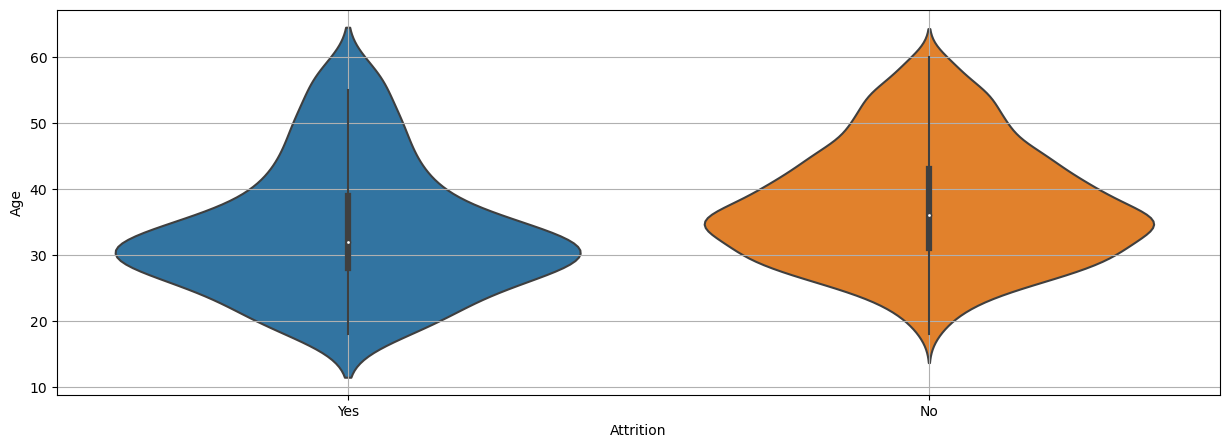

In [53]:
print(df["Age"].groupby(df["Attrition"]).mean())

plt.figure(figsize=(15,5))
sns.violinplot(x = df["Attrition"], y = df["Age"])
plt.grid()

<Axes: xlabel='Attrition', ylabel='count'>

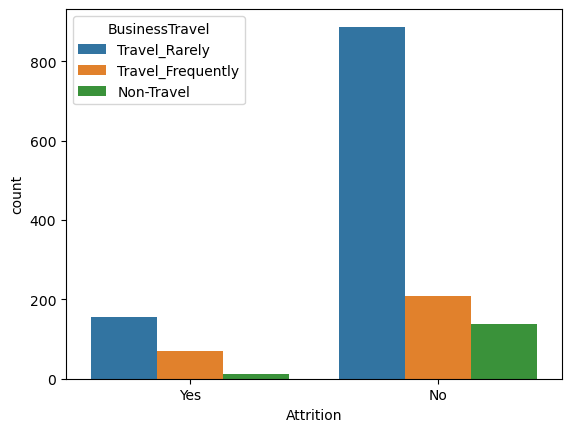

In [54]:

sns.countplot(data=df,x="Attrition",hue="BusinessTravel")

<Axes: xlabel='Attrition', ylabel='count'>

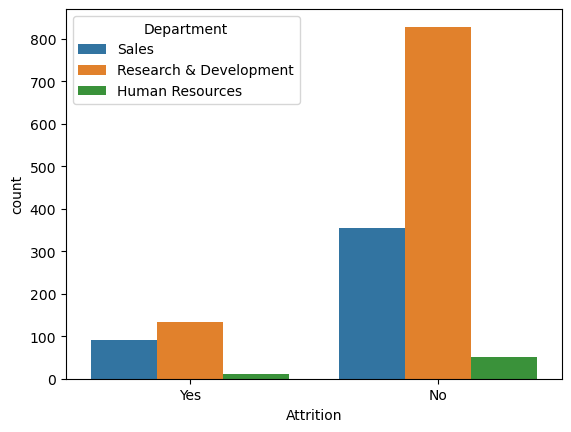

In [55]:
sns.countplot(data=df,x="Attrition",hue="Department")

In [56]:
print(df["Gender"].value_counts(normalize=True))

Male      0.6
Female    0.4
Name: Gender, dtype: float64


In [57]:
print(df["Gender"].groupby(df["Attrition"]).value_counts(normalize=True))

Attrition  Gender
No         Male      0.593674
           Female    0.406326
Yes        Male      0.632911
           Female    0.367089
Name: Gender, dtype: float64


<Axes: xlabel='Attrition', ylabel='count'>

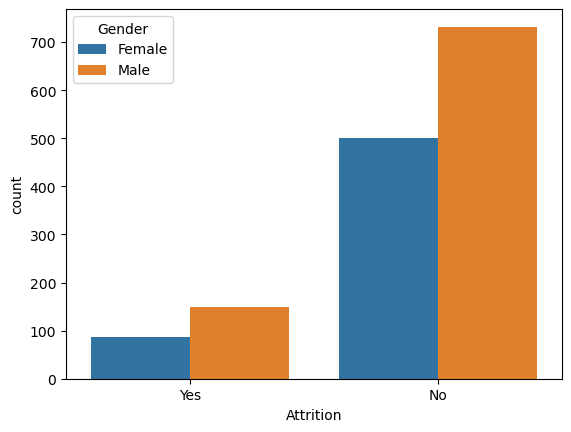

In [58]:
sns.countplot(data=df,x="Attrition",hue="Gender")

### Jobe Role and Job Level

In [59]:
#print(df["JobRole"].value_counts(normalize=True))

In [60]:
#print(df["JobRole"].groupby(df["Attrition"]).value_counts(normalize=True))
#  JobRole                   no attrition      attrition           JobRole  all employees 
# Sales Executive              0.218167        0.240506              0.221769
# Research Scientist           0.198702        0.198312              0.198639 
# Laboratory Technician        0.159773        0.261603              0.176190
# Manufacturing Director       0.109489        0.042194              0.098639
# Healthcare Representative    0.098946        0.037975              0.089116
# Manager                      0.078670        0.021097              0.069388
# Research Director            0.063260        0.008439              0.054422
# Sales Representative         0.040552        0.139241              0.056463
# Human Resources              0.032441        0.050633              0.035374

In [61]:
#  JobRole                  no attrition       attrition          percent total employees
# Sales Representative         4.0552%         13.9241%              5.6463%
# Laboratory Technician        15.9773%        26.1603%              17.6190%

# Laboratory Technician 
# Sales Representatives and Laboratory Technician have a higher rate of attrition when compared to their total percnet of employees
# 


In [62]:
# lower rate of attrition compared to total percent
#  JobRole                   no attrition      attrition       JobRole  all employees 
# Manufacturing Director      10.9489%         4.2194%               9.8639%
# Healthcare Representative    9.8946%         3.7975%              8.9116%
# Manager                      7.8670%         2.1097%              6.9388%


<Axes: xlabel='Attrition', ylabel='count'>

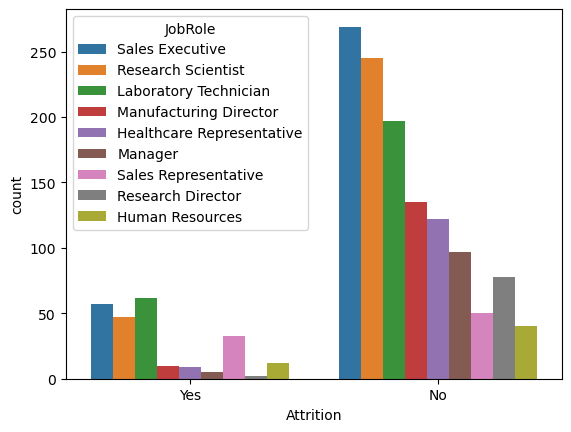

In [63]:
sns.countplot(data=df,x="Attrition",hue="JobRole")

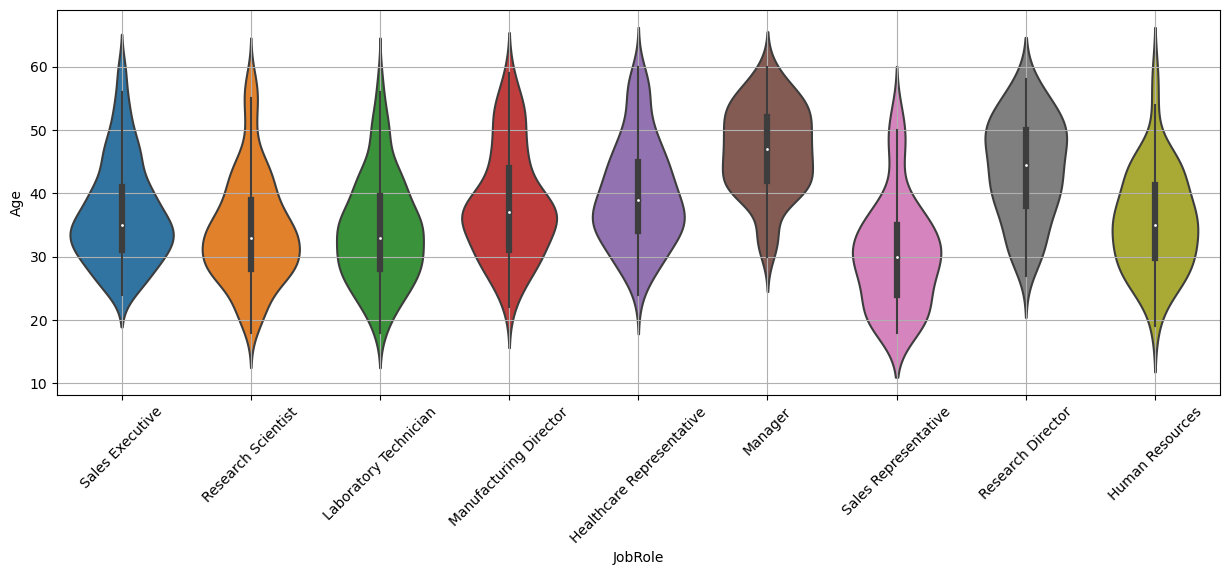

In [64]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.violinplot(x = df["JobRole"], y = df["Age"])
plt.grid()

In [65]:
#print(df["JobLevel"].value_counts(normalize=True))

In [66]:
#print(df["JobLevel"].groupby(df["Attrition"]).value_counts(normalize=True))

In [67]:
#print(df["JobRole"].groupby(df["JobLevel"]).value_counts(normalize=True))

<Axes: xlabel='JobLevel', ylabel='count'>

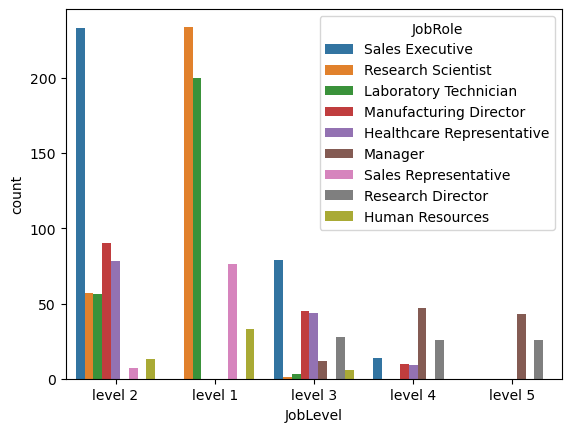

In [68]:
sns.countplot(data=df,x="JobLevel",hue="JobRole")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

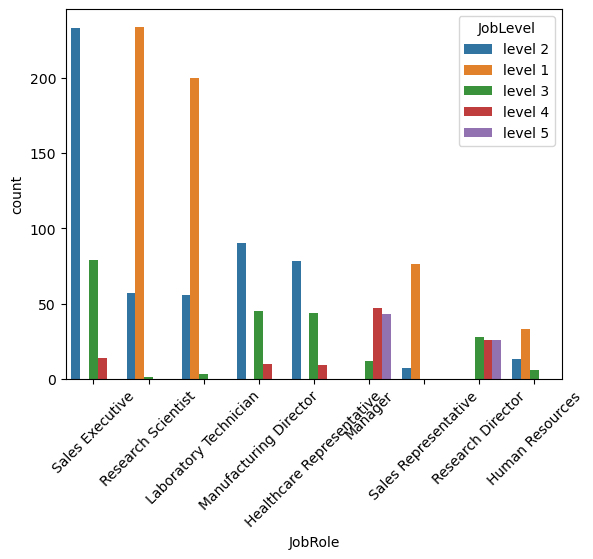

In [69]:
sns.countplot(data=df,x="JobRole",hue="JobLevel")
plt.xticks(rotation=45)

In [70]:
# JobLevel    no attrition    attrition    percent total employee
# level 1      0.324412       0.603376        0.369388
# level 2      0.390916       0.219409        0.363265       
# level 3      0.150852       0.135021        0.148299
# level 4      0.081914       0.021097        0.072109
# level 5      0.051906       0.021097        0.046939

# level 1 job role has a much higher rate of attrition than other levels

<Axes: xlabel='Attrition', ylabel='count'>

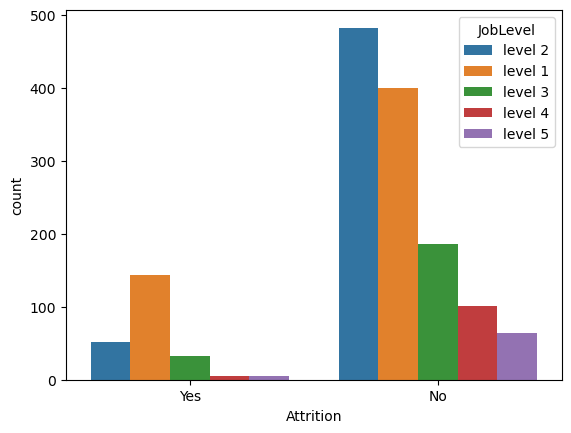

In [71]:
sns.countplot(data=df,x="Attrition",hue="JobLevel")

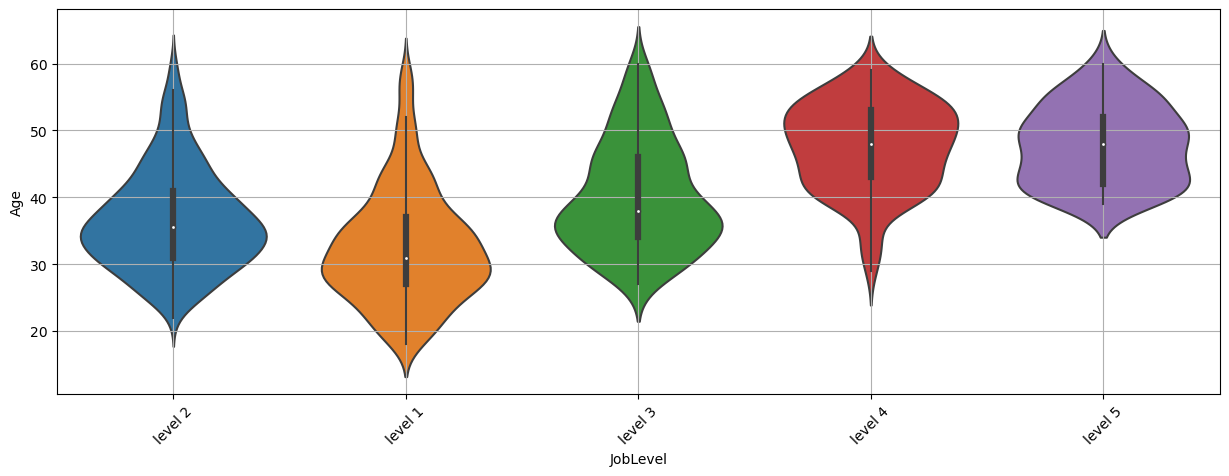

In [72]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.violinplot(x = df["JobLevel"], y = df["Age"])
plt.grid()

<Axes: xlabel='Attrition', ylabel='count'>

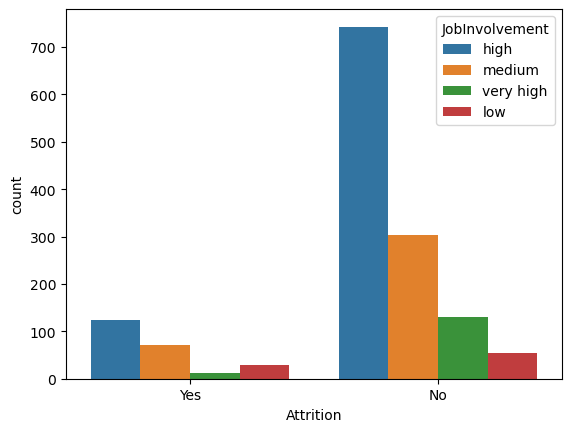

In [73]:
sns.countplot(data=df,x="Attrition",hue="JobInvolvement")

<Axes: xlabel='Attrition', ylabel='count'>

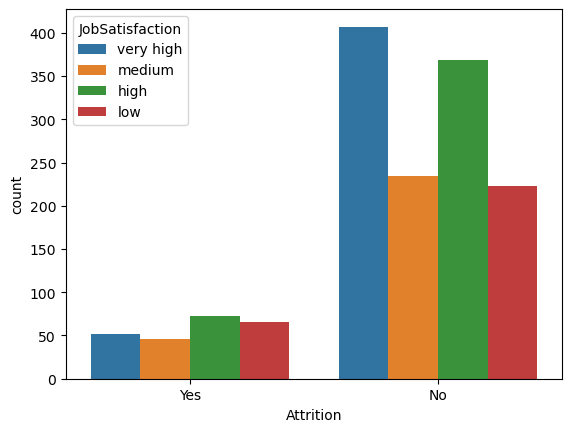

In [74]:
sns.countplot(data=df,x="Attrition",hue="JobSatisfaction")

<Axes: xlabel='Attrition', ylabel='count'>

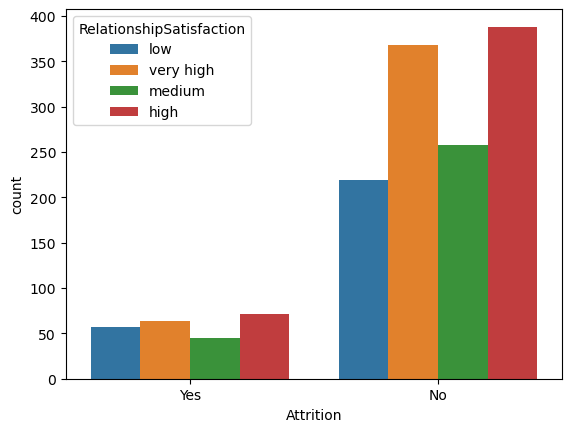

In [75]:
sns.countplot(data=df,x="Attrition",hue="RelationshipSatisfaction")

<Axes: xlabel='Attrition', ylabel='count'>

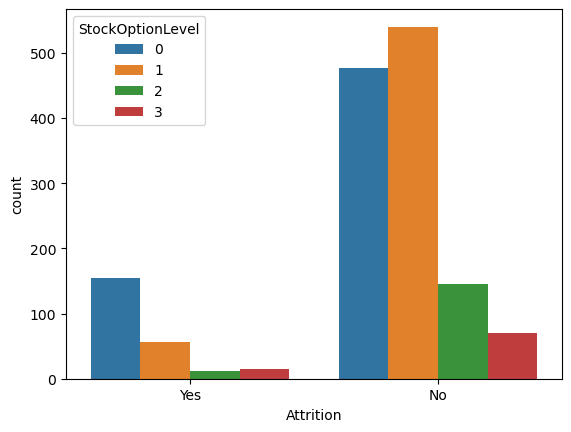

In [76]:
sns.countplot(data=df,x="Attrition",hue="StockOptionLevel")

<Axes: xlabel='Attrition', ylabel='count'>

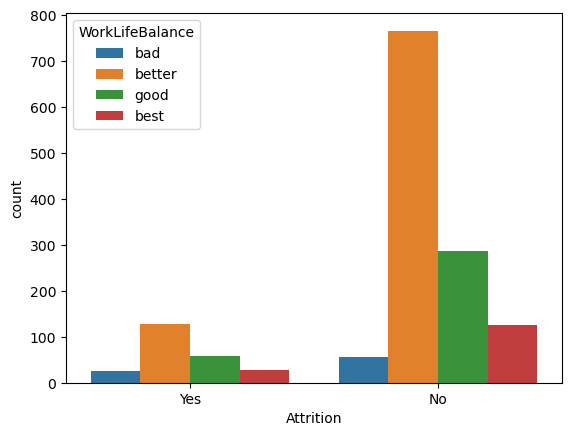

In [77]:
sns.countplot(data=df,x="Attrition",hue="WorkLifeBalance")

In [78]:
print(df["MonthlyIncome"].groupby(df["Attrition"]).mean())

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64


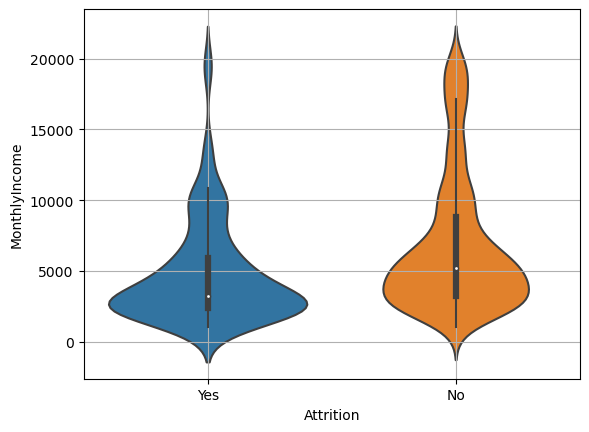

In [79]:
sns.violinplot(x = df["Attrition"], y = df["MonthlyIncome"])
plt.grid()

In [80]:
print(df["YearsAtCompany"].groupby(df["Attrition"]).mean())

Attrition
No     7.369019
Yes    5.130802
Name: YearsAtCompany, dtype: float64


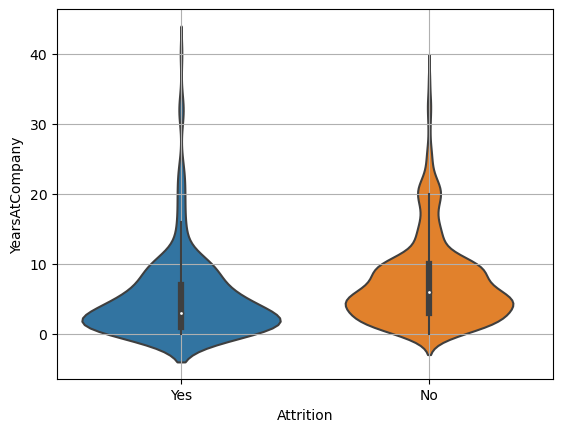

In [81]:
sns.violinplot(x = df["Attrition"], y = df["YearsAtCompany"])
plt.grid()

In [82]:
print(df["YearsInCurrentRole"].groupby(df["Attrition"]).mean())

Attrition
No     4.484185
Yes    2.902954
Name: YearsInCurrentRole, dtype: float64


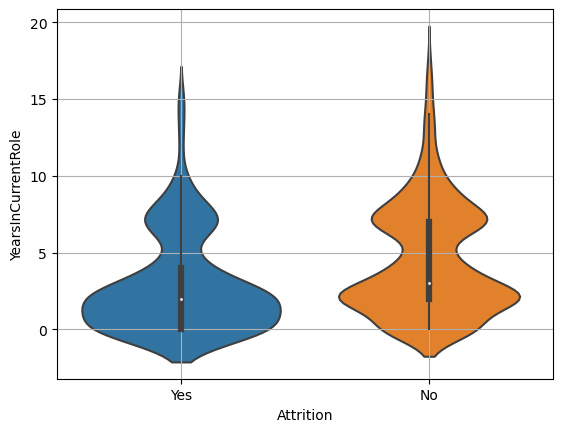

In [83]:
sns.violinplot(x = df["Attrition"], y = df["YearsInCurrentRole"])
plt.grid()

In [84]:
print(df["YearsWithCurrManager"].groupby(df["Attrition"]).mean())

Attrition
No     4.367397
Yes    2.852321
Name: YearsWithCurrManager, dtype: float64


<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

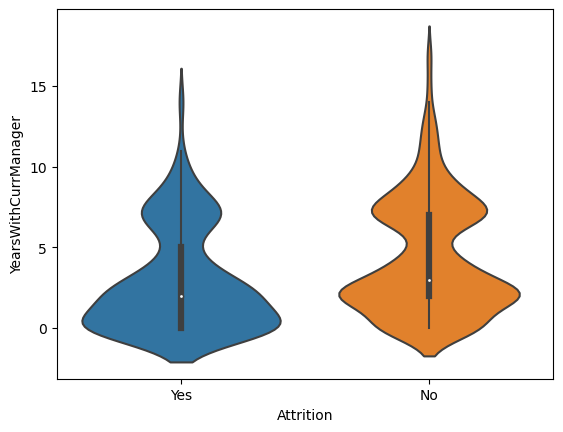

In [85]:

sns.violinplot(x = df["Attrition"], y = df["YearsWithCurrManager"])

# Report


Initial analysis of the data shows a relationship between employee attrition and thier job role and level. Sales representatives and labratory technicians have a higher rate of attrition when compared to thier percentage of total employees.  Sales Representatives make up 5.6463% of employees and 13.9241% of attrition, while Laboratory Technician make up 17.6190% of employees and 26.1603%  of attrition.

Job level 1 also had a strong relationship to attrition with 60.3376% percent of attrition while being 36.9388% percent of total employees. Most Sales Representatives and Laboratory Technicians are job level 1.  Job levels 1 and 2 make up 73.2653% percent of employees and 82.2785%  percent of attrition.

Average age, years at company, years in current role and years with current manager for employees that left are all lower than the average those that did.  Average monthly income of employees who left is lower than those who did not. This is expected due to the higher rate of attrition at lower levels and could alos influence employees decision to leave for better pay.

Further investigation into why these roles and levels have a much higher attrition rate could start by looking at Monthly income, percent salary hike and income.  Other benefits could also affect these outcomes but are not part of the data set.



Comparing job involvment, job satisfaction, work life balance, income and stock options would be the next step to determine relationships between these and determine if employee attrition is related to percieved work/work satisfaction versus benefits.
